In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
import random

<div dir='ltr'>
<h2>Loading Dataset</h2>
</div>

In [2]:
raw_train_data = np.load("train.npy")
raw_test_data = np.load("test.npy")
print("train:", raw_train_data.shape)
print("test: ", raw_test_data.shape)

train: (10, 5, 192, 168)
test:  (10, 4, 192, 168)


<div dir='ltr'>
<h2>Flattening Dataset</h2>
</div>

In [3]:
X_train = []
Y_train = []
for i in range(raw_train_data.shape[0]):
    for j in range(raw_train_data.shape[1]):
        X_train.append(raw_train_data[i][j].flatten())
        Y_train.append(i)
X_train = np.array(X_train, dtype=np.uint8)
X_train.shape

(50, 32256)

In [4]:
X_test = []
Y_test = []
for i in range(raw_test_data.shape[0]):
    for j in range(raw_test_data.shape[1]):
        X_test.append(raw_test_data[i][j].flatten())
        Y_test.append(i)
X_test = np.array(X_test, dtype=np.uint8)
X_test.shape

(40, 32256)

<div dir='ltr'>
<h2>A:</h2>
</div>

<div dir='rtl'>
نکته: ماتریس کوواریانس در واقع X_T * X است اما ابعاد این ماتریس خیلی زیاد شده و خیلی سخت مقادیر ویژه را میتوان به دست آورد. بنابراین عملا در این جا ماتریس X * X_T حساب شده است که مقادیر ویژه یکسانی دارد.
</div>

In [5]:
X = X_train - X_train.mean(axis=0)
cov = 1/len(X) * np.dot(X, X.transpose())
cov.shape

(50, 50)

In [6]:
eigenvalues,eigenvectors = np.linalg.eig(cov)
eigen_sorted = []
for i in range(len(eigenvalues)):
    eigen_sorted.append((eigenvalues[i], np.dot(X.transpose(), eigenvectors[:, i])))
eigen_sorted = list(reversed(sorted(eigen_sorted)))


top_5 = []
for i in range(5):
    top_5.append(eigen_sorted[i][0])

print("dimension of eigenvectors:", eigen_sorted[i][1].shape)
pd.DataFrame(top_5 , columns = ["Top5 Eigenvalues"])

dimension of eigenvectors: (32256,)


,Top5 Eigenvalues
0,3.436031e+07
1,1.198602e+07
2,4.582631e+06
3,2.243735e+06
4,1.989056e+06


<Figure size 432x288 with 0 Axes>

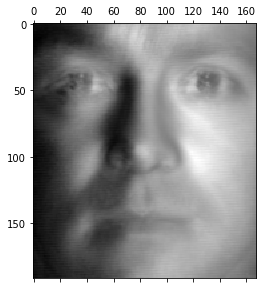

<Figure size 432x288 with 0 Axes>

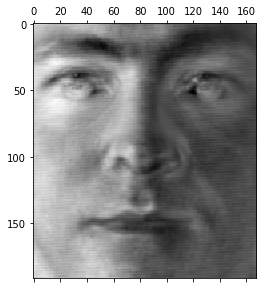

<Figure size 432x288 with 0 Axes>

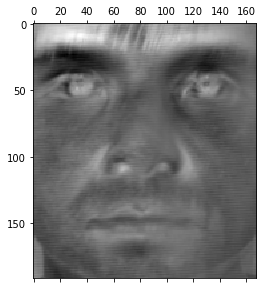

<Figure size 432x288 with 0 Axes>

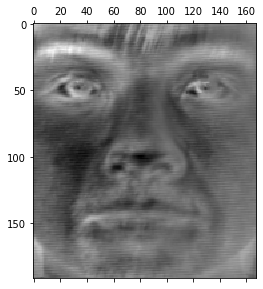

<Figure size 432x288 with 0 Axes>

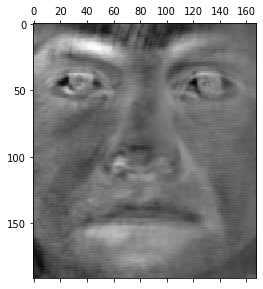

In [7]:
for i in range(5):
    plt.gray() 
    plt.matshow(eigen_sorted[i][1].reshape(raw_train_data[0][0].shape))
    plt.show()

<div dir='ltr'>
<h2>B1:</h2>
</div>

<div dir='rtl'>
همانطور که گفته شد از ماتریس X * X_T برای به دست آوردن مقادیر ویژه و بردارهای ویژه استفاده شده است.
    <p></p>
    برای اینکار ابتدار مقادیر ویژه و بردارهای ویژه ماتریس X * X_T محاسبه شد:
</div>

cov = 1/len(X) * np.dot(X, X.transpose())
eigenvalues,eigenvectors = np.linalg.eig(cov)

<div dir='rtl'>
    سپس با رابطه ریز مقادیر ویژه ماتریس X_T * X از روی مقادیر ویژه ماتریس X * X_T به دست آمد:
    <p></p>
    
</div>

np.dot(X.transpose(), eigenvectors[:, i]))

<div dir='rtl'>
    این محاسبات در بخش A انجام شده است و eigen_sorted مقادیر و بردارهای ویژه مطلوب را به صورت سورت شده دارد.
    <p></p>
    پس Eigen Face به شکل زیر است:
    
</div>

In [8]:
eigen_face = eigen_sorted[0][1].reshape(len(eigen_sorted[0][1]), 1)
for i in range(1, 5):
    eigen_face = np.hstack((eigen_face, eigen_sorted[i][1].reshape(len(eigen_sorted[i][1]), 1)))
eigen_face.shape

(32256, 5)

<div dir='ltr'>
<h2>B2:</h2>
</div>

<div dir='ltr'>
<h3>For Training Dataset:</h3>
</div>

1 --> actual: 


<Figure size 432x288 with 0 Axes>

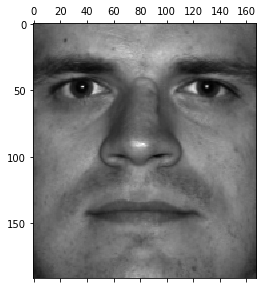

1 --> generated: 


<Figure size 432x288 with 0 Axes>

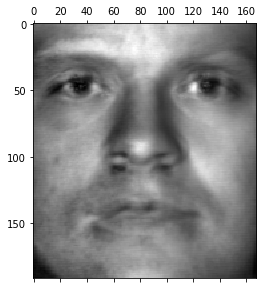

2 --> actual: 


<Figure size 432x288 with 0 Axes>

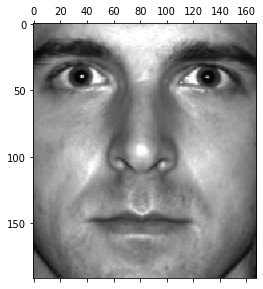

2 --> generated: 


<Figure size 432x288 with 0 Axes>

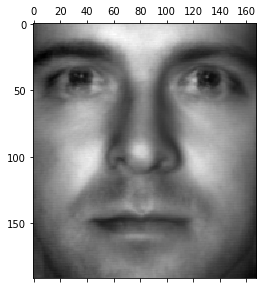

3 --> actual: 


<Figure size 432x288 with 0 Axes>

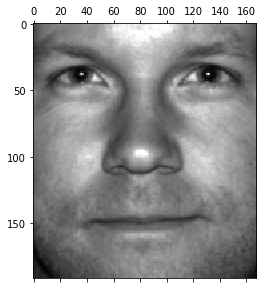

3 --> generated: 


<Figure size 432x288 with 0 Axes>

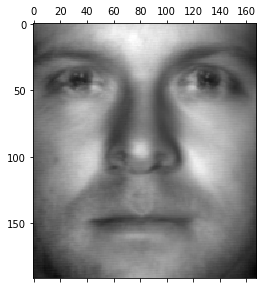

In [9]:
rnd = random.sample(range(10), 3)
indexes = (pd.Series(rnd) * 5).tolist()
for i, idx in enumerate(indexes):
    print(str(i + 1) + " --> actual: ")
    plt.gray() 
    plt.matshow(X_train[idx].reshape(raw_train_data[0][0].shape))
    plt.show()
    
    generated = np.dot(np.dot(X[idx], eigen_face) / np.linalg.norm(eigen_face, axis=0) ** 2, eigen_face.transpose()) + X_train.mean(axis=0)
    print(str(i + 1) + " --> generated: ")
    plt.gray()
    plt.matshow(generated.reshape(raw_train_data[0][0].shape))
    plt.show()

<div dir='ltr'>
<h3>For Test Dataset:</h3>
</div>

1 --> actual: 


<Figure size 432x288 with 0 Axes>

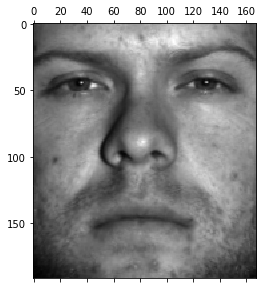

1 --> generated: 


<Figure size 432x288 with 0 Axes>

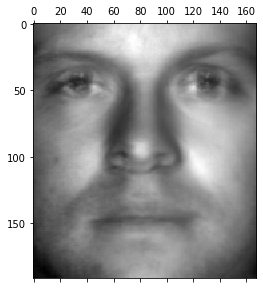

2 --> actual: 


<Figure size 432x288 with 0 Axes>

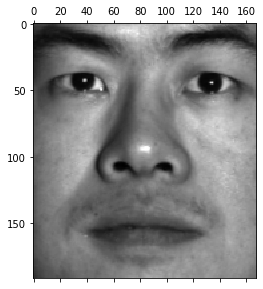

2 --> generated: 


<Figure size 432x288 with 0 Axes>

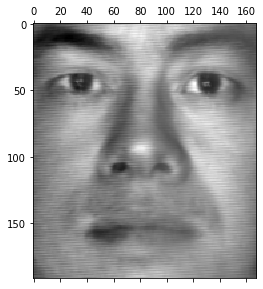

3 --> actual: 


<Figure size 432x288 with 0 Axes>

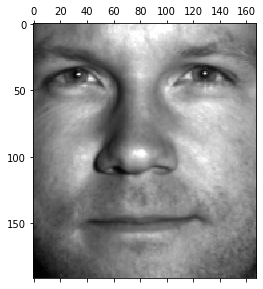

3 --> generated: 


<Figure size 432x288 with 0 Axes>

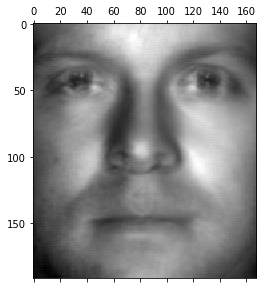

In [10]:
rnd = random.sample(range(10), 3)
indexes = (pd.Series(rnd) * 4).tolist()
for i, idx in enumerate(indexes):
    print(str(i + 1) + " --> actual: ")
    plt.gray() 
    plt.matshow(X_test[idx].reshape(raw_test_data[0][0].shape))
    plt.show()

    generated = np.dot(np.dot(X_test[idx] - X_train.mean(axis=0), eigen_face) / np.linalg.norm(eigen_face, axis=0) ** 2, eigen_face.transpose()) + X_train.mean(axis=0)
    print(str(i + 1) + " --> generated: ")
    plt.gray()
    plt.matshow(generated.reshape(raw_train_data[0][0].shape))
    plt.show()

<div dir='rtl'>
در کل خیلی دقت عکس‌های تولید شده مناسب نیست چون تنها از ۵ مولفه داریم استفاده میکنیم.
    <p></p>
    اما عکس‌های آموزش کمی بهتر از عکس‌های آزمون تولید می‌شوند که یک دلیل اصلی این است که میانگین این دو گروه با هم متفاوت است.
</div>

<div dir='ltr'>
<h2>C:</h2>
</div>

In [11]:
maximum = sum(map(lambda x: x[0], eigen_sorted))
cumulative_var = 0
number_of_params = 0
for eigen_value, eigen_vector in eigen_sorted:
    if cumulative_var > maximum * 0.99:
        break
    cumulative_var += eigen_value
    number_of_params += 1
    
number_of_params

30

<div dir='ltr'>
<h2>D:</h2>
</div>

<div dir='rtl'>
پس مجددا باید Eigen Face را تشکیل دهیم منتها اینبار از ۳۰ بردار ویژه برتر استفاده میکنیم.
</div>

In [12]:
eigen_face = eigen_sorted[0][1].reshape(len(eigen_sorted[0][1]), 1)
for i in range(1, 30):
    eigen_face = np.hstack((eigen_face, eigen_sorted[i][1].reshape(len(eigen_sorted[i][1]), 1)))
eigen_face.shape

(32256, 30)

<div dir='rtl'>
با استفاده از این Eigen Face جدید داده‌ها را به فضای مورد نظر می‌بریم.
    <p></p>
    مشاهده می‌شود که عکس‌های تولید شده بسیار شبیه عکس‌های واقعی هستند.
</div>

<div dir='ltr'>
<h3>For Training Dataset:</h3>
</div>

1 --> actual: 


<Figure size 432x288 with 0 Axes>

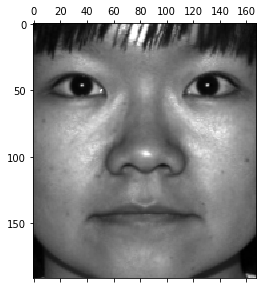

1 --> generated: 


<Figure size 432x288 with 0 Axes>

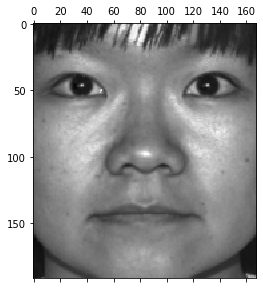

2 --> actual: 


<Figure size 432x288 with 0 Axes>

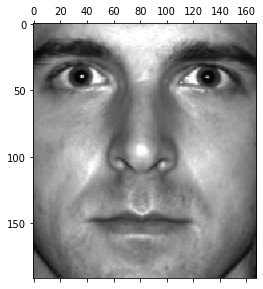

2 --> generated: 


<Figure size 432x288 with 0 Axes>

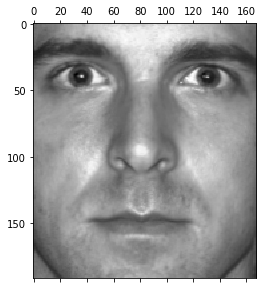

3 --> actual: 


<Figure size 432x288 with 0 Axes>

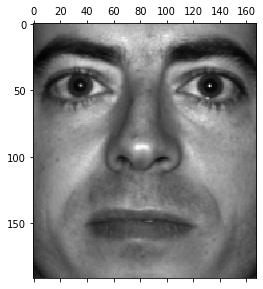

3 --> generated: 


<Figure size 432x288 with 0 Axes>

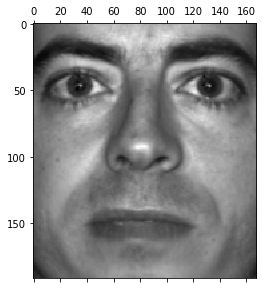

In [13]:
rnd = random.sample(range(10), 3)
indexes = (pd.Series(rnd) * 5).tolist()
for i, idx in enumerate(indexes):
    print(str(i + 1) + " --> actual: ")
    plt.gray() 
    plt.matshow(X_train[idx].reshape(raw_train_data[0][0].shape))
    plt.show()
    
    generated = np.dot(np.dot(X[idx], eigen_face) / np.linalg.norm(eigen_face, axis=0) ** 2, eigen_face.transpose()) + X_train.mean(axis=0)
    print(str(i + 1) + " --> generated: ")
    plt.gray()
    plt.matshow(generated.reshape(raw_train_data[0][0].shape))
    plt.show()

<div dir='ltr'>
<h3>For Test Dataset:</h3>
</div>

1 --> actual: 


<Figure size 432x288 with 0 Axes>

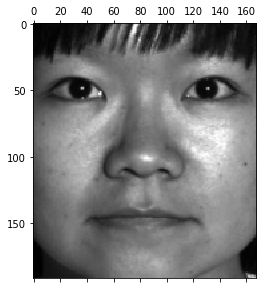

1 --> generated: 


<Figure size 432x288 with 0 Axes>

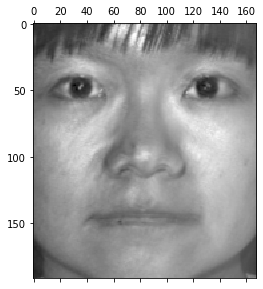

2 --> actual: 


<Figure size 432x288 with 0 Axes>

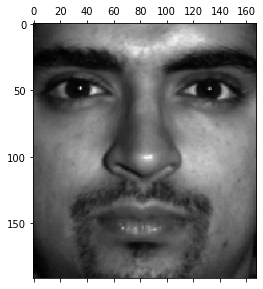

2 --> generated: 


<Figure size 432x288 with 0 Axes>

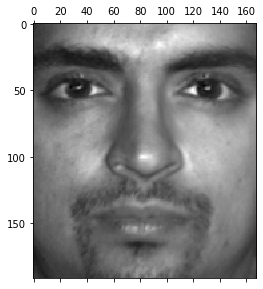

3 --> actual: 


<Figure size 432x288 with 0 Axes>

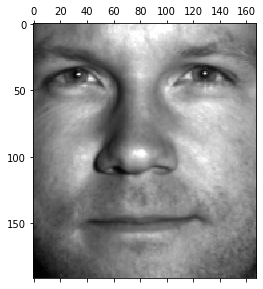

3 --> generated: 


<Figure size 432x288 with 0 Axes>

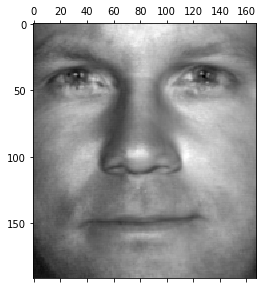

In [14]:
rnd = random.sample(range(10), 3)
indexes = (pd.Series(rnd) * 4).tolist()
for i, idx in enumerate(indexes):
    print(str(i + 1) + " --> actual: ")
    plt.gray() 
    plt.matshow(X_test[idx].reshape(raw_test_data[0][0].shape))
    plt.show()

    generated = np.dot(np.dot(X_test[idx] - X_train.mean(axis=0), eigen_face) / np.linalg.norm(eigen_face, axis=0) ** 2, eigen_face.transpose()) + X_train.mean(axis=0)
    print(str(i + 1) + " --> generated: ")
    plt.gray()
    plt.matshow(generated.reshape(raw_train_data[0][0].shape))
    plt.show()

<div dir='rtl'>
    <h4>دقت با استفاده از داده‌های اصلی:</h4>
</div>

In [15]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train, Y_train)

accuracy_test = SVM.score(X_test, Y_test)
accuracy_train = SVM.score(X_train, Y_train)

print("Actual Test Data Accuracy : " , accuracy_test)
print("Actual Train Data Accuracy : " , accuracy_train)

Actual Test Data Accuracy :  0.525
Actual Train Data Accuracy :  1.0


<div dir='rtl'>
    <h4>دقت با استفاده از داده‌های فشرده شده توسط PCA:</h4>
</div>

In [17]:

X_train_PCA = np.dot(X, eigen_face) / np.linalg.norm(eigen_face, axis=0) ** 2
X_test_PCA = np.dot(X_test - X_train.mean(axis=0), eigen_face) / np.linalg.norm(eigen_face, axis=0) ** 2

SVM = svm.SVC(kernel='linear')
SVM.fit(X_train_PCA, Y_train)

accuracy_test = SVM.score(X_test_PCA, Y_test)
accuracy_train = SVM.score(X_train_PCA, Y_train)

print("PCA Test Data Accuracy : " , accuracy_test)
print("PCA Train Data Accuracy : " , accuracy_train)

PCA Test Data Accuracy :  0.7
PCA Train Data Accuracy :  1.0


<div dir='rtl'>
    همانطور که مشاهده می‌شود در حالتی که از PCA استفاده شده اس، SVM با دقت بالاتری داده‌های را دسته‌بندی کرده است.
    <p></p>
    این امر نشان‌دهنده یک مزیت مهم PCA است که نه تنها حجم داده‌ها را به شکل قابل ملاحظه‌ای کم می‌کند بلکه خودش هم یک نوعی دارد با استفاده از واریانس داده‌ها دسته‌بندی انجام می‌دهد. یعنی اطلاعاتی را از هر داده نگه می‌دارد که به دسته‌بندی بسیار کمک می‌کند و کار دسته‌بند‌ها را آسان‌تر و بهینه‌تر می‌کند.
</div>